In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from nuq.dup import NuqClassifierDup


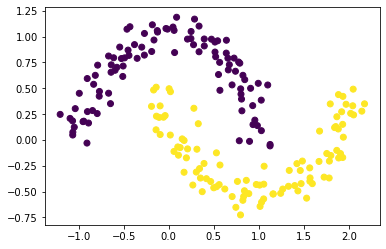

In [3]:
x, y = make_moons(200)
x += 0.1 * np.random.randn(200, 2)
plt.scatter(x[:, 0], x[:, 1], c=y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=40)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=40)

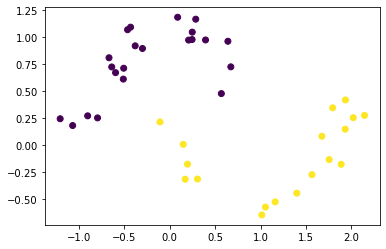

In [4]:
plt.scatter(x_val[:, 0], x_val[:, 1], c=y_val)

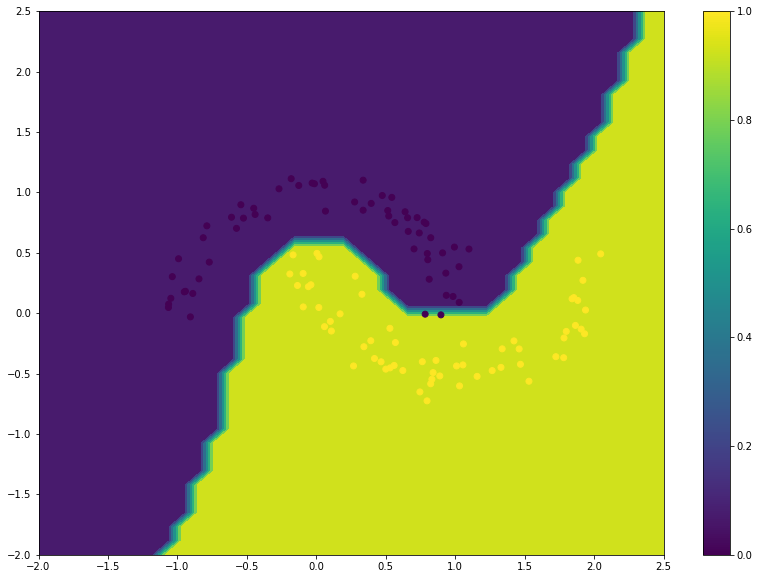

ValueError: cannot reshape array of size 1 into shape (40,40)

<Figure size 1008x720 with 0 Axes>

In [58]:
model = NuqClassifierDup(kernel_type='RBF')
model.fit(x_train, y_train)

fig_size = (14, 10)

x_mesh = np.array(np.meshgrid(np.linspace(-2, 2.5, 40), np.linspace(-2, 2.5, 40))).reshape(2, -1)
x_mesh = np.moveaxis(x_mesh, 0, 1)
prediction_mesh, _ = model.predict(x_mesh)
plt.figure(figsize=fig_size)
plt.contourf(x_mesh[:, 0].reshape((40, 40)), x_mesh[:, 1].reshape(40, 40), prediction_mesh.reshape(40, 40))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.colorbar()
plt.show()


model.kernel.gamma = 10
prediction_mesh, _ = model.predict(x_mesh)
prediction_mesh = prediction_mesh.max(axis=-1)
plt.figure(figsize=fig_size)
plt.contourf(x_mesh[:, 0].reshape((40, 40)), x_mesh[:, 1].reshape(40, 40), prediction_mesh.reshape(40, 40))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.colorbar()
plt.show()



nan nan


/home/beardysome/apps/nuq/nuq/dup.py:69: RuntimeWarning: invalid value encountered in true_divide
  probabilities[:, c] = np.sum(similarities, axis=1, where=(neighbor_labels == c)) / normalization
/home/beardysome/apps/nuq/nuq/dup.py:83: RuntimeWarning: divide by zero encountered in true_divide
  tau_square = (sigma_square / probability_density / N) * kernel_volume
/home/beardysome/apps/nuq/nuq/dup.py:83: RuntimeWarning: invalid value encountered in true_divide
  tau_square = (sigma_square / probability_density / N) * kernel_volume
/home/beardysome/apps/nuq/nuq/dup.py:90: RuntimeWarning: divide by zero encountered in log
  # np.isnan


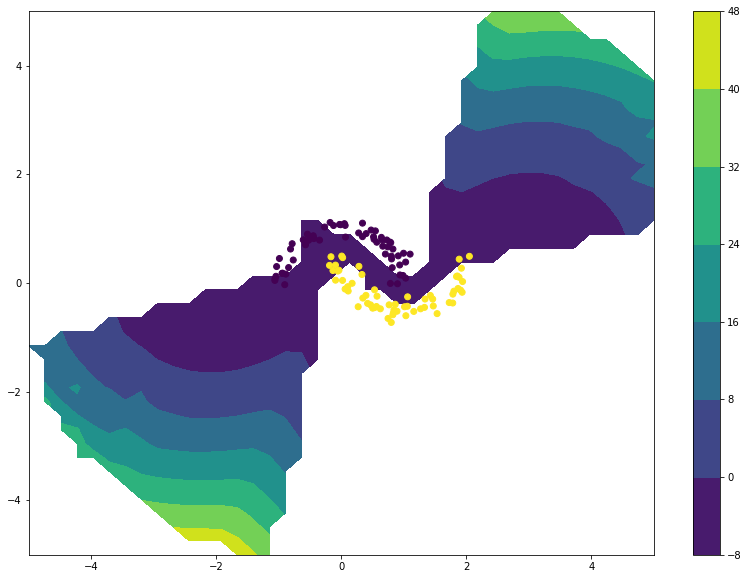

In [147]:
model = NuqClassifierDup(kernel_type='RBF', n_neighbors=20)
model.fit(x_train, y_train)

w = 5


x_mesh = np.array(np.meshgrid(np.linspace(-w, w, 40), np.linspace(-w, w, 40))).reshape(2, -1)
x_mesh = np.moveaxis(x_mesh, 0, 1)

model._update_bandwidth(0.5)



# _, uncertainty = model.predict_proba(x_mesh, 'aleatoric')
# prediction_mesh = uncertainty
# plt.figure(figsize=fig_size)
# plt.contourf(x_mesh[:, 0].reshape((40, 40)), x_mesh[:, 1].reshape(40, 40), prediction_mesh.reshape(40, 40))
# plt.colorbar()
# plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
# plt.show()

_, uncertainty = model.predict_proba(x_mesh, 'epistemic')
prediction_mesh = uncertainty
plt.figure(figsize=fig_size)
plt.contourf(x_mesh[:, 0].reshape((40, 40)), x_mesh[:, 1].reshape(40, 40), prediction_mesh.reshape(40, 40))
plt.colorbar()
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
print(np.min(prediction_mesh), np.max(prediction_mesh))
plt.show()

In [141]:
prediction_mesh.reshape(40, 40)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])